In [ ]:
#reconocimiento de raza de animales

hay un problema con el dataset, hay posibles razones:


1.   Pocas Imagenes
2.   Imagenes muy malas para el entrenamiento
3.   hay que ajustar el generador de set de datos (es el menos probable)




In [ ]:
#Crear las carpetas para subir las imagenes
!mkdir perros
!mkdir gatos
!mkdir conejos
!mkdir aves

In [ ]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd perros
!unzip perros.zip
%cd ..
%cd gatos
!unzip gatos.zip
%cd ..
%cd conejos
!unzip conejos.zip
%cd ..
%cd aves
!unzip aves.zip
%cd ..

/content/perros
Archive:  perros.zip
   creating: perros/
  inflating: perros/01-perro-cachorrito-153446-1024x576.jpg  
  inflating: perros/223749169-adorables-cachorritos-sobre-un-fondo-azul-el-cachorro-estC3A1-durmiendo.jpg  
  inflating: perros/32964857_5.jpg   
  inflating: perros/4023f65610fe14762c863faa6e05d369.jpg  
  inflating: perros/43Pe_header.png  
  inflating: perros/a735109e2cac6678373a3ed958c3d11e.jpg  
  inflating: perros/adwriter.jpg     
  inflating: perros/bass.jpg         
  inflating: perros/Basset-Hound-ficha-perro.jpg  
  inflating: perros/Basset-Hound-Puppy-Photos.jpg  
  inflating: perros/Basset-Hound.jpg  
  inflating: perros/beagle-puppies-on-white-background-2021-08-26-17-40-55-utc.jpg  
  inflating: perros/beautiful-golden-retriever-cute-puppy-260nw-2526542701.jpg  
  inflating: perros/cachorro-razas-de-perros-pequenos-y-carinosos-paradispets.jpg  
  inflating: perros/cascos-concepto-clC3ADnica-veterinaria-zoolC3B3gico-perro-sueC3B1o-178222695.jpg  
  infla

In [ ]:
#Borrar los archivo ZIP
!rm -rf /content/perros/perros.zip
!rm -rf /content/gatos/gatos.zip
!rm -rf /content/conejos/conejos.zip
!rm -rf /content/aves/aves.zip

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/perros/perros | wc -l #114
!ls /content/gatos/gatos | wc -l
!ls /content/conejos/conejos | wc -l
!ls /content/aves/aves | wc -l

45
92
78
69


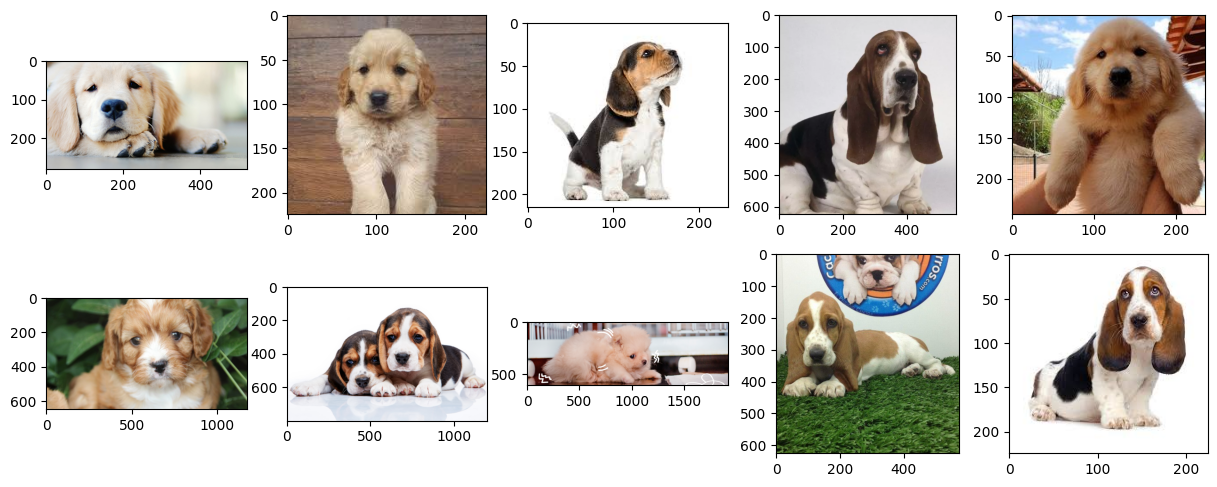

In [ ]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import UnidentifiedImageError

plt.figure(figsize=(15,15))

carpeta = '/content/perros/perros'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:10]):
    # Check if the file has a supported image extension
    if nombreimg.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
      plt.subplot(5,5,i+1)
      try:
        imagen = mpimg.imread(carpeta + '/' + nombreimg)
        plt.imshow(imagen)
      except UnidentifiedImageError as e:
        print(f"Error reading image {nombreimg}: {e}")
    else:
      print(f"Skipping unsupported file: {nombreimg}")

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/perros
!mkdir dataset/gatos
!mkdir dataset/conejos
!mkdir dataset/aves

In [ ]:
import shutil
import os

carpeta_fuente = '/content/perros/perros'
carpeta_destino = '/content/dataset/perros'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  # Check if it's a file before attempting to copy
  if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)) and i < 114:
    # Copy from the source to the destination folder
    shutil.copy(os.path.join(carpeta_fuente, nombreimg), os.path.join(carpeta_destino, nombreimg))


In [ ]:
import shutil
carpeta_fuente = '/content/gatos/gatos'
carpeta_destino = '/content/dataset/gatos'
import shutil
import os

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  # Check if it's a file before attempting to copy
  if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)) and i < 114:
    # Copy from the source to the destination folder
    shutil.copy(os.path.join(carpeta_fuente, nombreimg), os.path.join(carpeta_destino, nombreimg))


In [ ]:
import shutil
carpeta_fuente = '/content/conejos/conejos'
carpeta_destino = '/content/dataset/conejos'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  # Check if it's a file before attempting to copy
  if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)) and i < 114:
    # Copy from the source to the destination folder
    shutil.copy(os.path.join(carpeta_fuente, nombreimg), os.path.join(carpeta_destino, nombreimg))


In [ ]:
import shutil
carpeta_fuente = '/content/aves/aves'
carpeta_destino = '/content/dataset/aves'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  # Check if it's a file before attempting to copy
  if os.path.isfile(os.path.join(carpeta_fuente, nombreimg)):
    # Copy from the source to the destination folder
    shutil.copy(os.path.join(carpeta_fuente, nombreimg), os.path.join(carpeta_destino, nombreimg))


In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/perros | wc -l
!ls /content/dataset/gatos | wc -l
!ls /content/dataset/conejos | wc -l
!ls /content/dataset/aves | wc -l

45
92
78
69


Found 246 images belonging to 4 classes.
Found 26 images belonging to 4 classes.


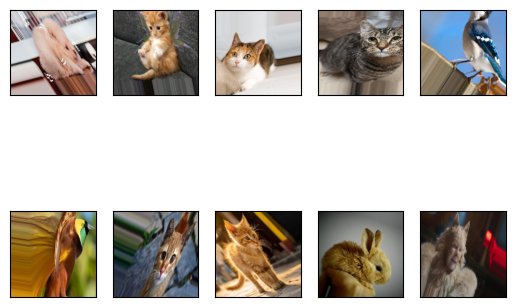

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,  # Still rescaling pixel values
    rotation_range=45,  # Increased rotation range to 45 degrees
    width_shift_range=0.2,  # Removing width shift
    height_shift_range=0.2,  # Removing height shift
    shear_range=15,  # Removing shear
    zoom_range=[0.7, 1.4],  # Removing zoom
    validation_split=0.1  # Keeping the validation split
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training',
                                                     class_mode='categorical') # Added class_mode='categorical'
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation',
                                                     class_mode='categorical') # Added class_mode='categorical'

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

# Wrap mobilenetv2 in a tf.keras.layers.Layer
class MobilenetV2Layer(tf.keras.layers.Layer):
    def __init__(self, mobilenetv2):
        super(MobilenetV2Layer, self).__init__()
        self.mobilenetv2 = mobilenetv2

    def call(self, inputs):
        return self.mobilenetv2(inputs)

# Now you can add the wrapped layer to the Sequential model
# Update the final Dense layer to match the number of classes in your target data
modelo = tf.keras.Sequential([
    MobilenetV2Layer(mobilenetv2), # Use the wrapped layer
    tf.keras.layers.Dense(4, activation='softmax') # Changed to 4 units, since we have 4 classes
])

In [ ]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 30

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.3568 - loss: 1.3885 - val_accuracy: 0.8077 - val_loss: 0.7366
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8343 - loss: 0.6816 - val_accuracy: 0.9231 - val_loss: 0.4010
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9288 - loss: 0.3396 - val_accuracy: 0.8462 - val_loss: 0.3250
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9565 - loss: 0.2274 - val_accuracy: 1.0000 - val_loss: 0.2172
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9748 - loss: 0.1468 - val_accuracy: 0.9231 - val_loss: 0.2264
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9482 - loss: 0.1610 - val_accuracy: 0.8462 - val_loss: 0.3741
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9789 - loss: 0.0890 - val_accuracy: 0.9615 - val_loss: 0.2060
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9833 - loss: 0.0942 - val_accuracy: 0.9615 - val_loss: 0.2202
Epoch 9/

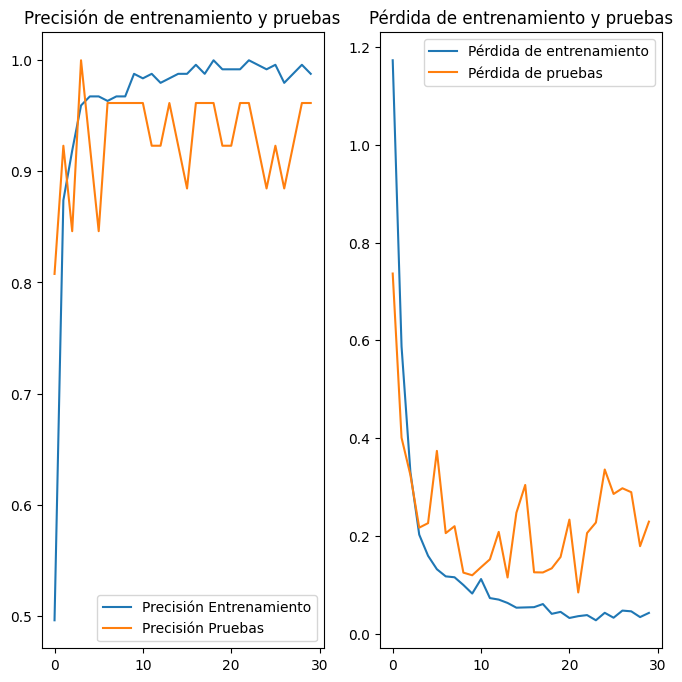

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

def categorizar(url):
  respuesta = requests.get(url, stream=True)
  # Check if the request was successful
  if respuesta.status_code == 200:
    try:
      # Open the image using Pillow
      img = Image.open(BytesIO(respuesta.content))
      # Convert the image to RGB format explicitly
      img = img.convert('RGB')
      img = np.array(img).astype(float) / 255

      img = cv2.resize(img, (224, 224))
      prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
      return np.argmax(prediccion[0], axis=-1)
    except (IOError, UnidentifiedImageError) as e:
      # Handle exceptions related to invalid image files.
      print(f"Error opening or processing image: {e}")
      return -1  # Or any other appropriate error value
  else:
    # Handle cases where the request is not successful.
    print(f"Error downloading image: HTTP status code {respuesta.status_code}")
    return -1  # Or any other appropriate error value

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Ave


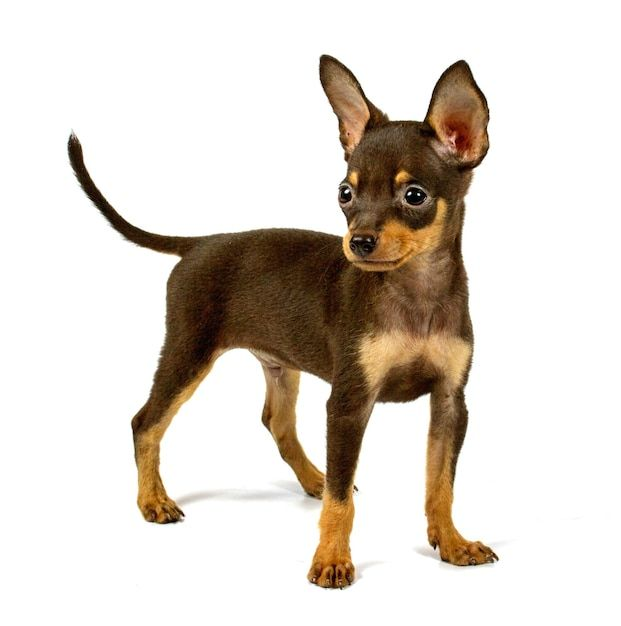

In [ ]:
# %% [code]
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

url = 'https://imgs.search.brave.com/z-7Jc57IO5LRxypr8O_p7TA5S04G0PGxJuxmgdfVE50/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9pbWcu/ZnJlZXBpay5jb20v/Zm90b3MtcHJlbWl1/bS9jYWNob3Jyby1j/aGlodWFodWEtcGVx/dWVub18xNDcyLTEw/NTQ1LmpwZz9zZW10/PWFpc19oeWJyaWQ'
prediccion = categorizar (url)
if prediccion == 0:  # Assuming 0 represents "Gato"
  print("Perro")
elif prediccion == 1:
  print("Gato")
elif prediccion == 2:  # Assuming 2 represents "Conejo"
  print("Conejo")
elif prediccion == 3:
  print("Ave")
else:
  print("Categoría desconocida")

response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)
image = Image.open(BytesIO(response.content))
display(image)